In [1]:
import warnings
import os
import sys

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))

sys.path.append(parent_dir)

In [2]:
from src.main.models.naivebayes import Naivebayes
from src.main.pipeline.functions import (clean_text, stop_words_removal, stemming, count_vectorizer)
from src.main.utilities.utils import get_dataset, split_train_val_test

import warnings
warnings.filterwarnings("ignore")

In [3]:
# define model and pipeline
naivebayes = Naivebayes()
naivebayes.pipeline = [clean_text, stop_words_removal, stemming, count_vectorizer]

# import dataset and apply pipeline
inputs, targets = get_dataset()
inputs = naivebayes.run_pipeline(inputs, save=True)

In [4]:
# stratified train test split
x_train, x_val, x_test, y_train, y_val, y_test = split_train_val_test(inputs, targets, validation_size=0.2, test_size=0.1)

In [5]:
# model training 
# search = logistic.grid_search(x_train, y_train, n_iter=5)
# search.best_estimator_
naivebayes.fit(x_train, y_train)

In [6]:
from sklearn.metrics import classification_report
from src.main.utilities import plotting

y_pred = naivebayes.predict(x_test)
print(classification_report(y_test, y_pred))
#results = plotting.compute_performance(y_test, y_pred)
#plotting.print_performance(results)

               precision    recall  f1-score   support

Entertainment       0.75      0.77      0.76      1914
         Life       0.89      0.93      0.91      4226
     Politics       0.86      0.91      0.88      3190
       Sports       0.89      0.52      0.66       436
       Voices       0.72      0.52      0.61      1058

     accuracy                           0.84     10824
    macro avg       0.82      0.73      0.76     10824
 weighted avg       0.84      0.84      0.83     10824



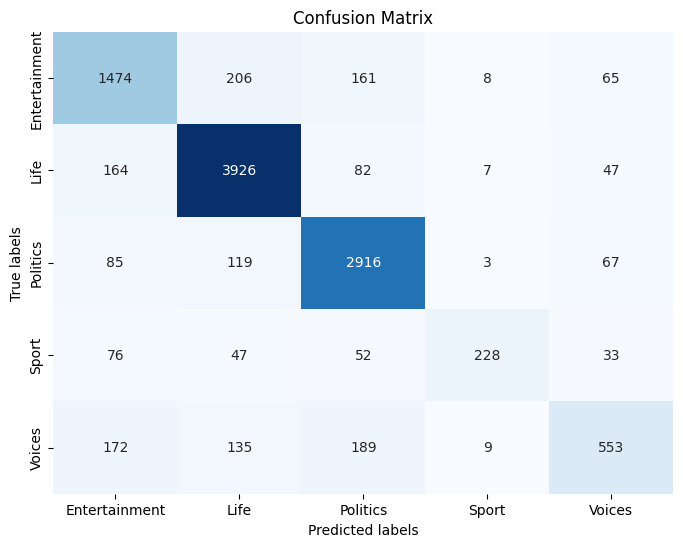

In [7]:
plotting.plot_confusion_matrix(y_test, y_pred)